In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully ✓")
# That's it! Everything else is the same.

Libraries loaded successfully ✓


In [4]:
# Load the parquet file
data_path = "ddos.parquet"  # Change to actual filename

print("Loading BCCC-Cloud-DDoS-2024 dataset...")
df = pd.read_parquet(data_path)

print(f"✓ Loaded {len(df):,} records")
print(f"✓ Features: {len(df.columns)} columns")
print(f"✓ Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading BCCC-Cloud-DDoS-2024 dataset...
✓ Loaded 540,494 records
✓ Features: 319 columns
✓ Memory usage: 669.59 MB


In [5]:
# Dataset shape
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset shape: (540494, 319)

First 5 rows:


,src_port,dst_port,duration,packets_count,fwd_packets_count,bwd_packets_count,total_payload_bytes,fwd_total_payload_bytes,bwd_total_payload_bytes,payload_bytes_max,...,max_fwd_payload_bytes_delta_len,mean_fwd_payload_bytes_delta_len,mode_fwd_payload_bytes_delta_len,variance_fwd_payload_bytes_delta_len,std_fwd_payload_bytes_delta_len,median_fwd_payload_bytes_delta_len,skewness_fwd_payload_bytes_delta_len,cov_fwd_payload_bytes_delta_len,label,activity
0,54573,25094,0.000063,3,2,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
1,25094,54573,0.000000,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
2,54573,25094,0.000028,3,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
3,9147,18060,0.000055,3,2,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
4,18060,9147,0.000000,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


Label distribution:
label
Benign        349178
Attack        170436
Suspicious     20880
Name: count, dtype: int64


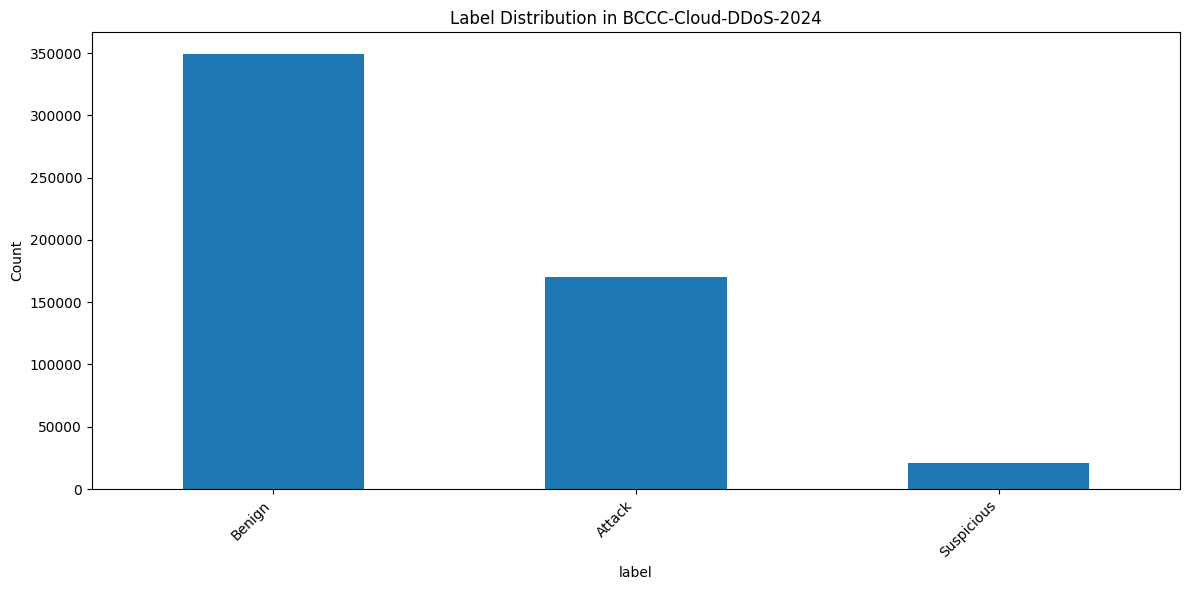

In [9]:
# Check label distribution
print("Label distribution:")
print(df['label'].value_counts())

# Visualize
df['label'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Label Distribution in BCCC-Cloud-DDoS-2024')
plt.xlabel('label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Check columns
print(f"Total columns: {len(df.columns)}\n")
print("First 20 columns:")
print(df.columns[:20].tolist())

# Data types
print("\nData types summary:")
print(df.dtypes.value_counts())

Total columns: 319

First 20 columns:
['src_port', 'dst_port', 'duration', 'packets_count', 'fwd_packets_count', 'bwd_packets_count', 'total_payload_bytes', 'fwd_total_payload_bytes', 'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_min', 'payload_bytes_mean', 'payload_bytes_std', 'payload_bytes_variance', 'payload_bytes_median', 'payload_bytes_skewness', 'payload_bytes_cov', 'payload_bytes_mode', 'fwd_payload_bytes_max', 'fwd_payload_bytes_min']

Data types summary:
float32    261
int8        25
int32       20
int16        9
int64        2
object       2
Name: count, dtype: int64


In [11]:
# Check for missing values
missing = df.isnull().sum()
if missing.sum() > 0:
    print("Columns with missing values:")
    print(missing[missing > 0])
else:
    print("✓ No missing values!")

✓ No missing values!


In [12]:
# Numeric columns statistics
df.describe()

,src_port,dst_port,duration,packets_count,fwd_packets_count,bwd_packets_count,total_payload_bytes,fwd_total_payload_bytes,bwd_total_payload_bytes,payload_bytes_max,...,cov_bwd_payload_bytes_delta_len,min_fwd_payload_bytes_delta_len,max_fwd_payload_bytes_delta_len,mean_fwd_payload_bytes_delta_len,mode_fwd_payload_bytes_delta_len,variance_fwd_payload_bytes_delta_len,std_fwd_payload_bytes_delta_len,median_fwd_payload_bytes_delta_len,skewness_fwd_payload_bytes_delta_len,cov_fwd_payload_bytes_delta_len
count,540494.000000,540494.000000,540494.000000,5.404940e+05,5.404940e+05,5.404940e+05,5.404940e+05,5.404940e+05,5.404940e+05,540494.000000,...,540494.000000,540494.000000,540494.000000,540494.000000,540494.000000,5.404940e+05,540494.000000,540494.000000,540494.000000,540494.000000
mean,42256.697427,24618.095415,0.237969,1.869889e+01,5.484738e+00,1.321415e+01,2.024913e+04,2.954250e+03,1.729487e+04,2.659815,...,2.551771,-1.179016,1.092710,-0.045987,-0.816701,2.572928e+02,0.683516,-0.025944,-0.000270,0.480301
std,15823.578431,20865.794262,9.947224,5.620174e+03,1.683385e+03,4.597685e+03,6.977092e+06,2.134364e+06,6.642618e+06,51.832596,...,960.238342,29.584854,29.106281,8.374863,22.682816,7.558142e+03,16.025793,8.065406,0.151881,197.925171
min,2.000000,1.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,-9073.369141,-1460.000000,-970.000000,-970.000000,-1460.000000,0.000000e+00,0.000000,-970.000000,-104.726799,-7541.995117
25%,41063.000000,5060.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,45094.000000,18784.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,53083.000000,44756.000000,0.000092,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,65534.000000,65535.000000,3570.692627,2.524044e+06,1.097428e+06,2.171786e+06,3.166384e+09,1.569076e+09,3.166383e+09,1460.000000,...,655582.562500,1368.000000,1460.000000,1368.000000,1368.000000,1.338966e+06,1157.137085,1368.000000,3.875500,138843.906250
